In [90]:
import pandas as pd
temp = pd.read_csv('temp_seoul_no.csv', encoding='cp949')

In [91]:
temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [92]:
# non-Null 데이터 개수 확인 
# 전체 데이터 41765개
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41766 non-null  object 
 1   지점       41765 non-null  float64
 2   평균기온(℃)  41009 non-null  float64
 3   최저기온(℃)  41006 non-null  float64
 4   최고기온(℃)  41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [93]:
# 컬럼 이름 확인
temp.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [94]:
temp.columns[2]

'평균기온(℃)'

In [95]:
# 3번째 변수 값이 NULL인 값의 개수 출력
temp[temp.columns[2]].isna().sum()

757

In [96]:
# temp 데이터 프레임에 파생 변수 등을 추가하기 위해 copy
temp_new = temp.copy()

In [97]:
temp_new.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3


In [98]:
# 변수 이름 평균기온을 temp_mean으로 변경
temp_new = temp_new.rename(columns = {temp_new.columns[2] : 'temp_mean'})

In [99]:
temp_new.head()

,날짜,지점,temp_mean,최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [100]:
temp_new = temp_new.rename(columns = {temp_new.columns[3] : 'temp_min'})

In [101]:
temp_new = temp_new.rename(columns = {temp_new.columns[4] : 'temp_max'})

In [102]:
temp_new.info() # 변수 이름 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41766 non-null  object 
 1   지점         41765 non-null  float64
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [103]:
temp_new[['temp_max']].max() # 서울지역 최고 기온 확인

temp_max    39.6
dtype: float64

In [104]:
temp_new.query('temp_max == 39.6')

,날짜,지점,temp_mean,temp_min,temp_max
40051,\t2018-08-01,108.0,33.6,27.8,39.6


In [105]:
# 날짜 변수 값이 \t로 시작하는 것을 확인
# 날짜 변수 값에서 \t를 삭제
temp_new['날짜'] = temp_new['날짜'].str.replace('\t', '')

In [106]:
# 날짜 변수 값에 \t가 삭제된 것을 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


In [107]:
temp_new.info() # 날짜 데이터 타입이 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41766 non-null  object 
 1   지점         41765 non-null  float64
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [108]:
# 변수 날짜의 데이터 타입을 datetime으로 변경
# 변수 날짜의 각각의 값에 대해 (apply(lambda x))
# 날짜 값을 datetime 유형으로 변환 (pd.to_datetime(str(x), format = '%Y-%m-%d'))
temp_new['날짜'] = temp_new['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [109]:
# 변수 날짜 데이터 타입이 datetime으로 변경 된 것을 확인
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         41765 non-null  datetime64[ns]
 1   지점         41765 non-null  float64       
 2   temp_mean  41009 non-null  float64       
 3   temp_min   41006 non-null  float64       
 4   temp_max   41006 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.6 MB


In [110]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


## 일교차(일별 온도차) 구하기

In [111]:
# 일교차 구하고 파생변수 diff로 생성
temp_new['diff'] = temp_new['temp_max'] - temp_new['temp_min']

In [112]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff
0,1907-10-01,108.0,13.5,7.9,20.7,12.8
1,1907-10-02,108.0,16.2,7.9,22.0,14.1
2,1907-10-03,108.0,16.2,13.1,21.3,8.2
3,1907-10-04,108.0,16.5,11.2,22.0,10.8
4,1907-10-05,108.0,17.6,10.9,25.4,14.5


In [113]:
# 역대 일교차가 가장 컸던 날의 일교차는?
temp_new.sort_values('diff', ascending=False).head(10)

,날짜,지점,temp_mean,temp_min,temp_max,diff
12619,1942-04-19,108.0,12.7,2.5,24.3,21.8
3863,1918-04-29,108.0,16.7,4.6,26.3,21.7
3147,1916-05-13,108.0,18.1,8.3,29.7,21.4
13980,1946-01-09,108.0,-8.1,-13.6,7.7,21.3
6026,1924-03-31,108.0,9.0,-1.0,20.2,21.2
7696,1928-10-26,108.0,14.3,4.5,25.7,21.2
559,1909-04-12,108.0,11.1,-0.9,20.2,21.1
3545,1917-06-15,108.0,23.8,13.5,34.5,21.0
2062,1913-05-24,108.0,19.7,9.2,30.0,20.8
11513,1939-04-09,108.0,10.6,0.6,21.4,20.8


## 날짜를 년(year), 월(month), 일(day)로 나누기

In [114]:
# 날짜에서 년을 구하여 파생 변수 year로 저장
temp_new['year'] = temp_new['날짜'].dt.year

In [115]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year
0,1907-10-01,108.0,13.5,7.9,20.7,12.8,1907.0
1,1907-10-02,108.0,16.2,7.9,22.0,14.1,1907.0
2,1907-10-03,108.0,16.2,13.1,21.3,8.2,1907.0
3,1907-10-04,108.0,16.5,11.2,22.0,10.8,1907.0
4,1907-10-05,108.0,17.6,10.9,25.4,14.5,1907.0


In [116]:
# 날짜에서 월을 구하여 파생 변수 month로 저장
temp_new['month'] = temp_new['날짜'].dt.month

In [117]:
# 날짜에서 일을 구하여 파생 변수 day로 저장
temp_new['day'] = temp_new['날짜'].dt.day

In [118]:
# 파생변수 year month day 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
0,1907-10-01,108.0,13.5,7.9,20.7,12.8,1907.0,10.0,1.0
1,1907-10-02,108.0,16.2,7.9,22.0,14.1,1907.0,10.0,2.0
2,1907-10-03,108.0,16.2,13.1,21.3,8.2,1907.0,10.0,3.0
3,1907-10-04,108.0,16.5,11.2,22.0,10.8,1907.0,10.0,4.0
4,1907-10-05,108.0,17.6,10.9,25.4,14.5,1907.0,10.0,5.0


In [119]:
# 데이터 프레임 temp_new에서 결측치 개수 확인
pd.isna(temp_new).sum()

날짜             1
지점             1
temp_mean    757
temp_min     760
temp_max     760
diff         761
year           1
month          1
day            1
dtype: int64

In [120]:
# 데이터 프레임 temp_new에서 변수 temp_mean, temp_min, temp_max 결측치 제거
temp_new = temp_new.dropna(subset = ['temp_mean', 'temp_min', 'temp_max'])

In [121]:
# 결측치 개수 확인
pd.isna(temp_new).sum()

날짜           0
지점           0
temp_mean    0
temp_min     0
temp_max     0
diff         0
year         0
month        0
day          0
dtype: int64

In [127]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41005 entries, 0 to 41764
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         41005 non-null  datetime64[ns]
 1   지점         41005 non-null  float64       
 2   temp_mean  41005 non-null  float64       
 3   temp_min   41005 non-null  float64       
 4   temp_max   41005 non-null  float64       
 5   diff       41005 non-null  float64       
 6   year       41005 non-null  float64       
 7   month      41005 non-null  float64       
 8   day        41005 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.1 MB


In [128]:
temp_new.describe()

,지점,temp_mean,temp_min,temp_max,diff,year,month,day
count,41005.0,41005.000000,41005.000000,41005.000000,41005.000000,41005.000000,41005.000000,41005.000000
mean,108.0,11.755398,7.463731,16.759898,9.296166,1965.390733,6.514620,15.727277
std,0.0,10.657712,10.884382,10.974986,3.232933,33.752712,3.454078,8.801030
min,108.0,-19.200000,-23.100000,-16.300000,1.000000,1907.000000,1.000000,1.000000
25%,108.0,2.700000,-1.400000,7.300000,7.000000,1935.000000,4.000000,8.000000
50%,108.0,12.900000,8.000000,18.600000,9.200000,1967.000000,7.000000,16.000000
75%,108.0,21.200000,17.100000,26.300000,11.500000,1995.000000,10.000000,23.000000
max,108.0,33.700000,30.300000,39.600000,21.800000,2023.000000,12.000000,31.000000


In [122]:
# 월별 평균 일교차가 큰 달을 알아보기
temp_new.groupby('month')\
    .agg(diff_mean = ('diff', 'mean'))\
    .sort_values('diff_mean', ascending = False)

,diff_mean
month,
10.0,10.866916
5.0,10.844700
4.0,10.817507
6.0,9.722262
3.0,9.609164
9.0,9.464925
11.0,9.405089
2.0,8.874397
1.0,8.436826


In [123]:
# 월별 평균 기온 알아보기
temp_new.groupby('month')\
    .agg(mean_temp = ('temp_mean', 'mean'))

,mean_temp
month,
1.0,-3.534057
2.0,-0.902883
3.0,4.559349
4.0,11.473175
5.0,17.012298
6.0,21.538988
7.0,24.809706
8.0,25.554249
9.0,20.641441


In [124]:
# 역대 1월 평균 기온 변화를 알아보기
temp_jan = temp_new.query('month == 1.0')
temp_jan.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
92,1908-01-01,108.0,-5.9,-9.1,-1.3,7.8,1908.0,1.0,1.0
93,1908-01-02,108.0,-7.7,-13.9,-3.0,10.9,1908.0,1.0,2.0
94,1908-01-03,108.0,-6.2,-10.8,-2.9,7.9,1908.0,1.0,3.0
95,1908-01-04,108.0,-7.5,-12.8,-1.7,11.1,1908.0,1.0,4.0
96,1908-01-05,108.0,-4.8,-11.3,-0.1,11.2,1908.0,1.0,5.0


In [125]:
# 년도별 1월 평균 기온 출력하기
mean_temp_jan = temp_jan.groupby('year')\
    .agg(mean_temp_jan = ('temp_mean', 'mean'))
mean_temp_jan.head()

,mean_temp_jan
year,
1908.0,-3.464516
1909.0,-2.509677
1910.0,-2.258065
1911.0,-4.961290
1912.0,-4.687097


<AxesSubplot:xlabel='year'>

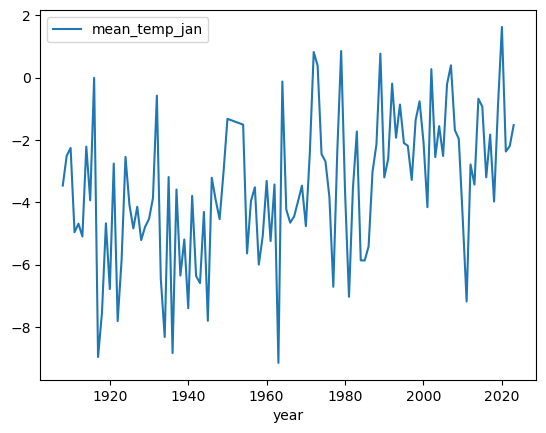

In [126]:
# 년도별 1월 평균 기온은 라인 그래프로 출력하기
mean_temp_jan.plot.line()